# Project Advanced Statistics

#### Problem Statement-1: Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

##### Problem 1A:

##### 1 - State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

##### 2 - Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### 3 - Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### 4 - If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)


##### Problem 1B:

##### 1 - What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

##### 2 - Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

##### 3 - Explain the business implications of performing ANOVA for this particular case study.

In [133]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols # For n-way Anova
from statsmodels.stats.anova import _get_covariance,anova_lm #For n-way ANOVA
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Reading data-set file

salary = pd.read_csv('F:\\Solutions and datasets\\Data Sets\\SalaryData.csv')

In [3]:
# Checking first 5 rows of the data.

salary.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

#### About Data: Data file contains information about the salary of people with 3 types of Education background and 4 types of Occupations.  

In [4]:
# Checking the shape of the data.

salary.shape

(40, 3)

In [5]:
# Describing the stats of data.

salary.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

In [6]:
# Checking for null/missing values in the data.

salary.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [7]:
# Checking for duplicate values in the data.

salary.duplicated().sum()

0

In [8]:
# Checking the information of the dataframe.

salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


##### Data Observation:

* Total 40 rows and 3 columns, where in 2 columns carry object data type and 1 column has int64 data type. 

* There is no missing value and duplicate value in the data set.

* From data summary, we can observe that the data is highly varied with standard deviation of around 65000 in the Salary.

* We need to convert two object type data types variables into categorical data type to make data suitable for conducting Anova test.


In [9]:
# Converting the variable 'Education' into categorical data type:

salary.Education = pd.Categorical(salary.Education)
salary.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [10]:
# Converting the variable 'Occupation' into Categorical data type:

salary.Occupation = pd.Categorical(salary.Occupation)
salary.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

#### Part 1 (A) 

##### Ques 1.1 - State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

#### 1.1.1)  Formulating the hypothesis of the One-way ANOVA of 'Salary' variable with the 'Education' variable.

* Null Hypothesis ($H_0$) : The mean salary of each education category is equal.

i.e.  mean(Salary of Doctorate)'$\mu_1$' = mean(Salary of Bachelors)'$\mu_2$' = mean(Salary of HS-grad)'$\mu_3$' 

* Alternate Hypothesis ($H_A$) : The mean salary of atleast one education category is not equal. 

#### 1.1.2) Formulating the hypothesis of the One-way ANOVA of 'Salary' variable with the 'Occupation' variable.

* Null Hypothesis ($H_0$) : The mean salary of each occupation category is equal.

i.e.  mean(Salary of Prof-speciality)'$\mu_1$' = mean(Salary of Sales)'$\mu_2$' = mean(Salary of Adm-clerical)'$\mu_3$' = mean(Salary of Exec-managerial)'$\mu_4$'

* Alternate Hypothesis ($H_A$) : The mean salary of atleast one occupation category is not equal. 

##### Ques 1.2 - Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### Since we have already converted the 'Education' variable into categorical data type, so we are ready to perform one-way Anova test with one numeric variable 'Salary' and one categorical variable 'Education'. 

##### One way Anova test on Salary with respect to Education.

In [11]:
formula = 'Salary ~ C(Education)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


<AxesSubplot:xlabel='Education', ylabel='Salary'>

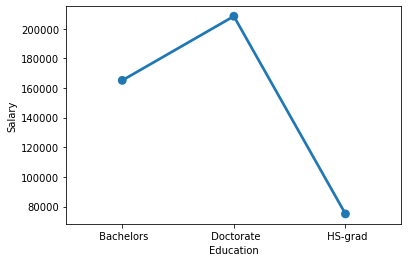

In [12]:
sns.pointplot(x='Education', y='Salary', data=salary, ci=None)

#### Inference: From the above table, we observe that the p_value is less than the significance level ($\alpha$) i.e. 0.05, therefore we reject the null hypothesis ($H_0$) with 95% confidence and conclude that the mean salary of atleast one Education category is not equal. 

##### As we can also observe optically from the above plot, that the salary of candidates with 'Doctorate' education level is much higher than those with education level of 'HS-grad'.

##### Ques-1.3) - Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### Since we have also converted the 'Occupation' variable into categorical data type, so we are ready to perform one-way Anova test with one numeric variable 'Salary' and one categorical variable 'Occupation'. 

##### One way Anova test on Salary with respect to Occupation.

In [13]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


##### Visualizing Salary of Candidates working in different occupation through point plot.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

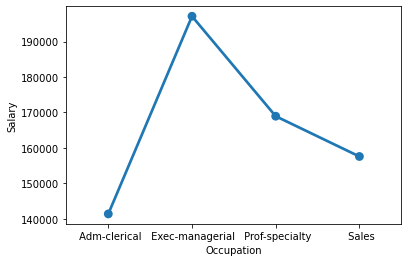

In [14]:
sns.pointplot(x='Occupation',y='Salary', data=salary, ci=None)

##### Inference : From the above table, we observe that the p_value is greater than the significance level ($\alpha$) i.e. 0.05, therefore we fail to reject the null hypothesis ($H_0$), hence we can conclude that the mean salary of each Occupation category is equal. 

##### However, by observing optically through point plot above, it shows that there is a huge difference in salary of candidates working in different occupation, but this difference in salary is due to occupation of candidates is not proven by the statistical test above, so we cannot say with enough confidence that occupation category alone is a significant factor in influencing Salary.

##### Ques 1.4) - If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

##### * As we have observed above that the null hypothesis was rejected in 2nd question that is 'Anova test for salary with respect to Education'.
##### * Now let's find out for which class of Education, mean salary is significantly different.


In [134]:
Salary_Education_class_different = pairwise_tukeyhsd(endog=salary['Salary'],groups=salary['Education'],alpha=0.05)
print(Salary_Education_class_different)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


##### Inference: From the above pairwise_tukeyhsd table, it is evident that the mean salary for all the education class is different. 

### Part 1 (B) :

##### Ques 1.5) - What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function] 

##### Checking the interaction between treatments 'Education' and 'Occupation'.


In [15]:
formula = 'Salary ~ C(Education):C(Occupation)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education):C(Occupation)  11.0  1.438019e+11  1.307290e+10  18.384842   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education):C(Occupation)  3.340466e-10  
Residual                             NaN  


#### Inference 1.5)- From the above table observation,  p_value of interaction between the two treatments is much lower than the significance level '$\alpha$' i.e. 0.05, therefore, there is enough evidence to say that there is a strong interaction between treatments 'Education' and 'Occupation'.  So, we can say with 95 % confidence that there is an influence of the interaction of these two treatments over 'Salary'. 

#### Let's visualise the interaction of treatments by plotting point plot. 

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

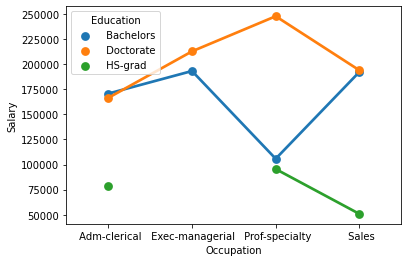

In [16]:
sns.pointplot(x='Occupation',y='Salary',data=salary, hue='Education', ci=None)

##### Observations from the above plot of treatments interaction:

##### * Candidate with education degree of 'HS-Grad' are getting low salaries when compared to other education class. However, candidate with HS-grad education working in occupation category 'Sales' are getting the lowest salary among all. 

##### * On the other hand, we can observe that the candidate with education degree of 'Doctorate' and working in occupation category 'Prof-speciality' are getting the highest salary among all. 

##### In other words we can easily infer from the interaction statistical procedure and the plot above that the salary of cadidates in different occupations categories is callibrated by the different education levels. or candidates with a different education level have different salary in the same occupation. 
##### for eg. Salary in sales occupation is higher for candidates with 'Doctorate' and 'Bachelors' education level whereas less salary for candidate with HS-grad education level.

##### So, there is a significant influence of interaction of treatments over 'Salary' which is observed through interaction p_value done by statistical Anova_test and optically by interaction point plot above.

##### Ques 1.6 - Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

##### *Formulating hypothesis for conducting two way Anova test on 'Salary' with respect to two treatments 'Education' and 'Occupation'.

###### Null Hypothesis '$H_0$' : The means of 'Salary' variable with respect to each 'Education' and 'Occupation' is equal.

###### Alternate Hypothesis '$H_A$' : The mean of atleast one 'Salary' variable with respect to each 'Education' and 'Occupation' is not equal. 

#### *Performing Anova test on 'Salary' with respect to both 'Education', 'Occupation' along with their interaction. 

In [17]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


#### Interpreting result (Ques-1.6): 

###### * p_value of 'Education' and 'Education-Occupation' interaction is lower than significance level that is 0.05. Therefore, we can say with 95% confidence that the variable 'Education and (Education-Occupation) interaction' are significant factors in influencing Salary, since the means of Salary is not equal with respect to these two factors.

##### However, even after interaction, the p_value of 'Occupation' variable is slightly higher than significance level, therefore we can not say with 95% confidence but with 93% confidence that 'Occupation' is also a factor in influencing Salary.

##### So, we can conclude that initially 'Education' was the only factor in determining 'Salary' but after interaction effect of 'Education' and 'Occupation', the 'Occupation' has also come very close to be a significant factor in determining or influencing 'Salary'.  

#### Ques 1.7) - Explain the business implications of performing ANOVA for this particular case study.

##### Business Implications:

#### From this case study, where we concluded that the "Education" is more significant factor for influencing salary and we also observed optically through plots that the candidates with higher education are getting good salary in comparison to the candidates with lower education levels. 

##### * So, by knowing that the 'Education level' and interaction of 'Education' and 'Occupation' is a significant factor in determining 'Salary' of a candidate, a business can guess the 'Salary' or Income level of it's customers just by accessing the information about customer's Education and Occupation and recommend products or services accordingly. 

##### * A Business can recommend it's premium/expensive products and services range to the customers having higher education level eg. 'Doctorate' and working as a 'Prof-speciality' or 'Exec-Managerial', and on the other hand, they can recommend lower segment/economical products and services range to the customers having lower Education level eg. 'HS-Grad' and working in 'Occupation' like 'Sales', 'Adm'Clerical'. 



#### Problem 2: The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

#### 2.1 - Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

#### 2.2 - Is scaling necessary for PCA in this case? Give justification and perform scaling.

#### 2.3 - Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

#### 2.4 - Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

#### 2.5 - Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

#### 2.6 - Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

#### 2.7 - Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

#### 2.8 - Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

#### 2.9 - Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [96]:
### reading data

college = pd.read_csv('F:\Solutions and datasets\Data Sets\Education+-+Post+12th+Standard.csv')

##### Ques 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?


##### Let's perform some basic exploratory data analysis before performing univariate and multivariate data analysis.

In [19]:
# Checking top 5 rows of data in transpose form.

college.head().T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F.Undergrad                          2885                2683            1036   
P.Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room.Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S.F.Ratio                            18.1                12.2            12.9   
perc.alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad.Rate                              60                  56              54   

                               3                          4  
Names        Agnes Scott College  Alaska Pacific University  
Apps                         417                        193  
Accept                       349                        146  
Enroll                       137                         55  
Top10perc                     60                         16  
Top25perc                     89                         44  
F.Undergrad                  510                        249  
P.Undergrad                   63                        869  
Outstate                   12960                       7560  
Room.Board                  5450                       4120  
Books                        450                        800  
Personal                     875                       1500  
PhD                           92                         76  
Terminal                      97                         72  
S.F.Ratio                    7.7                       11.9  
perc.alumni                   37                          2  
Expend                     19016                      10922  
Grad.Rate                     59                         15

In [20]:
# Checking shape of the data

college.shape

(777, 18)

In [21]:
# Checking Data Summary using transpose form.

college.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [22]:
# Checking missing values

college.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [23]:
# Checking Duplicate values.

college.duplicated().sum()

0

In [24]:
# Checking data information: 

college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

#### Data Set Observation: 

##### * The data set has 777 rows and  18 columns.

##### * The data types in the set are 16 (int64) , 1 (Object type) and 1 (float64).

##### * There are no missing and duplicated value in the data set.

##### * One anamoly is founded through data summary in the PhD column, as the maximum percentage of faculty with PhD degree in any college cannot be 103%, so it requires treatment in the data set. 

##### * We need to drop the 'Names' column (object data type) from the data set, since we'll not be needing it in PCA.

##### * There are four columns 'Room.Board', 'Books', 'Personal', 'Expend' all are related to the expenses of students in their respective colleges, therefore these columns have a possibility of being co-related. 

##### * Also, maximum grad-rate of a college can be above 100% but in a rare condition, so maximum grad-rate of 118 seems to be a anamoly.  

##### * Some columns name like 'F.Undergad','P.Undergrad', 'Room.Board','S.F.Ratio','perc.alumni','Grad.Rate' are needed to be renamed.

### DataSet Cleanup and Treatment

#### Dropping 'Names' column from the data set.

In [25]:
college_new = college.drop(['Names'], axis=1)

In [26]:
college_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

##### Removing 'dots' from column names by renaming them.   

In [27]:
college_new = college_new.rename(columns = {'Apps':'Applications','F.Undergrad': 'Fulltime_Undergrad', 
                                            'P.Undergrad': 'Parttime_Undergrad','Room.Board':'Room_Board',
                                     'S.F.Ratio':'S_F_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'}, inplace=False)

In [28]:
# Checking columns names in new college data frame:

college_new.head()

Applications  Accept  Enroll  Top10perc  Top25perc  Fulltime_Undergrad  \
0          1660    1232     721         23         52                2885   
1          2186    1924     512         16         29                2683   
2          1428    1097     336         22         50                1036   
3           417     349     137         60         89                 510   
4           193     146      55         16         44                 249   

   Parttime_Undergrad  Outstate  Room_Board  Books  Personal  PhD  Terminal  \
0                 537      7440        3300    450      2200   70        78   
1                1227     12280        6450    750      1500   29        30   
2                  99     11250        3750    400      1165   53        66   
3                  63     12960        5450    450       875   92        97   
4                 869      7560        4120    800      1500   76        72   

   S_F_Ratio  perc_alumni  Expend  Grad_Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

#### Treating Anomalies:

In [29]:
# Replacing values:

college_new.PhD.replace(to_replace= 103, value= 100, inplace = True )
college_new.Grad_Rate.replace(to_replace= 118, value= 100, inplace = True)

In [30]:
# Checking data frame after treatment:

college_new.describe().T

count          mean          std     min     25%     50%  \
Applications        777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept              777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll              777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc           777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc           777.0     55.796654    19.804778     9.0    41.0    54.0   
Fulltime_Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
Parttime_Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate            777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room_Board          777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books               777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal            777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD                 777.0     72.656371    16.321324     8.0    62.0    75.0   
Terminal            777.0     79.702703    14.722359    24.0    71.0    82.0   
S_F_Ratio           777.0     14.089704     3.958349     2.5    11.5    13.6   
perc_alumni         777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend              777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad_Rate           777.0     65.440154    17.118804    10.0    53.0    65.0   

                        75%      max  
Applications         3624.0  48094.0  
Accept               2424.0  26330.0  
Enroll                902.0   6392.0  
Top10perc              35.0     96.0  
Top25perc              69.0    100.0  
Fulltime_Undergrad   4005.0  31643.0  
Parttime_Undergrad    967.0  21836.0  
Outstate            12925.0  21700.0  
Room_Board           5050.0   8124.0  
Books                 600.0   2340.0  
Personal             1700.0   6800.0  
PhD                    85.0    100.0  
Terminal               92.0    100.0  
S_F_Ratio              16.5     39.8  
perc_alumni            31.0     64.0  
Expend              10830.0  56233.0  
Grad_Rate              78.0    100.0

#### 2.1.1 - Performing Univariate Analysis: 

##### *Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn names number of bins as arguments.

##### *The function will display the statistical description of the numeric variable, histogram or histplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [31]:
 def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(college_new[column].describe(),end=' ')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------")
    sns.histplot(college_new[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print("------------------------------")
    sns.boxplot(x=college_new[column])
    plt.show()
    
    
    

In [35]:
# Making columns of data set 'college_new' into a list.

list_college_new= list(college_new.columns.values)
len(list_college_new)

17

Description of Applications
--------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Applications, dtype: float64 Distribution of Applications
----------------------------------


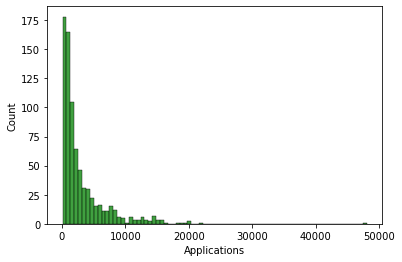

Boxplot of Applications
------------------------------


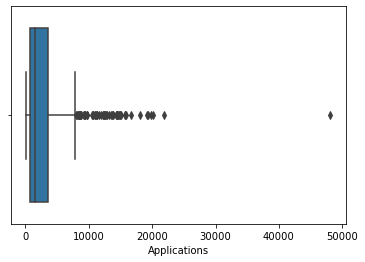

Description of Accept
--------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------


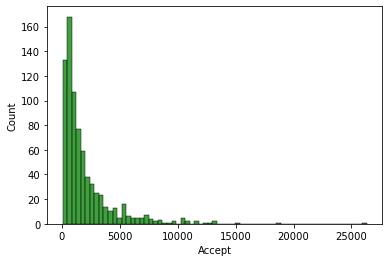

Boxplot of Accept
------------------------------


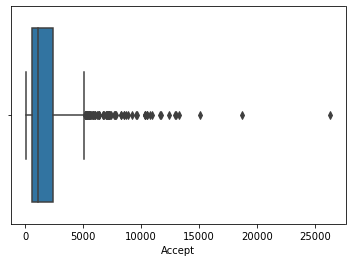

Description of Enroll
--------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------


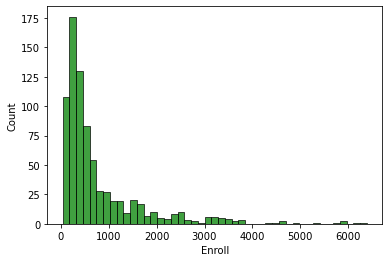

Boxplot of Enroll
------------------------------


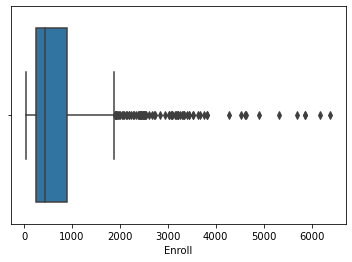

Description of Top10perc
--------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------


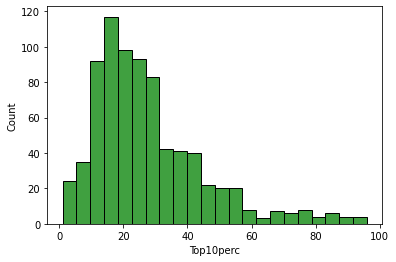

Boxplot of Top10perc
------------------------------


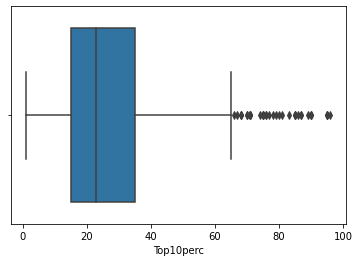

Description of Top25perc
--------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------


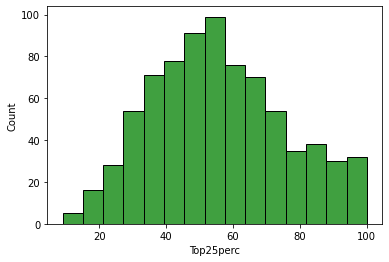

Boxplot of Top25perc
------------------------------


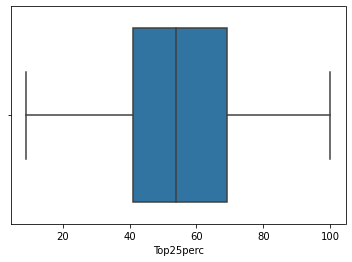

Description of Fulltime_Undergrad
--------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: Fulltime_Undergrad, dtype: float64 Distribution of Fulltime_Undergrad
----------------------------------


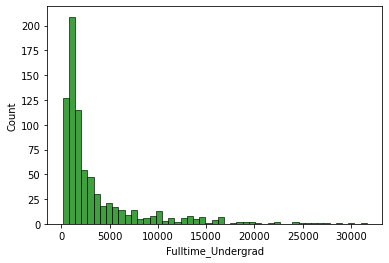

Boxplot of Fulltime_Undergrad
------------------------------


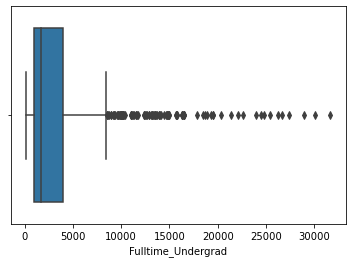

Description of Parttime_Undergrad
--------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: Parttime_Undergrad, dtype: float64 Distribution of Parttime_Undergrad
----------------------------------


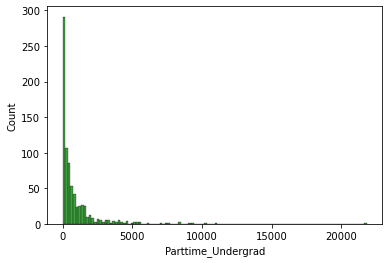

Boxplot of Parttime_Undergrad
------------------------------


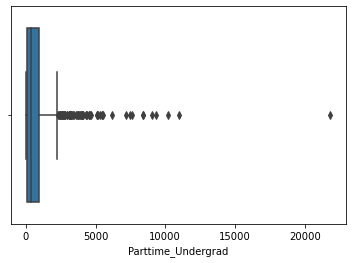

Description of Outstate
--------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------


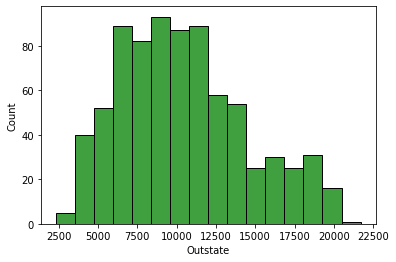

Boxplot of Outstate
------------------------------


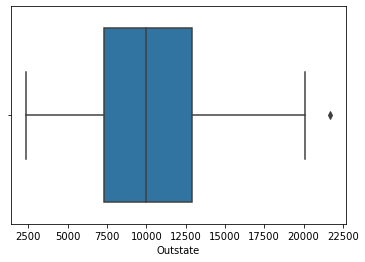

Description of Room_Board
--------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room_Board, dtype: float64 Distribution of Room_Board
----------------------------------


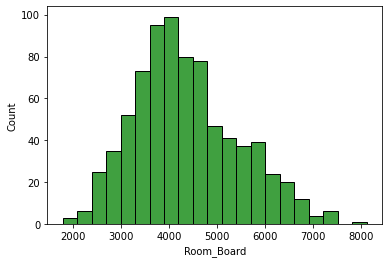

Boxplot of Room_Board
------------------------------


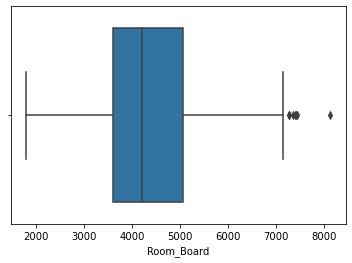

Description of Books
--------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------


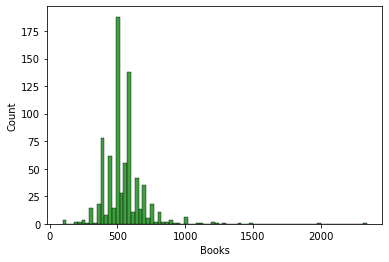

Boxplot of Books
------------------------------


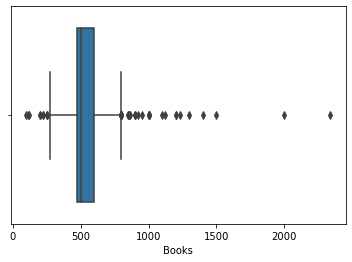

Description of Personal
--------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------


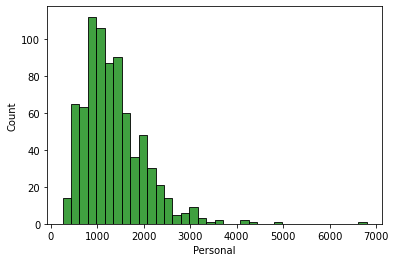

Boxplot of Personal
------------------------------


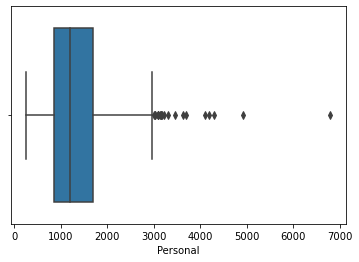

Description of PhD
--------------------------------
count    777.000000
mean      72.656371
std       16.321324
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------


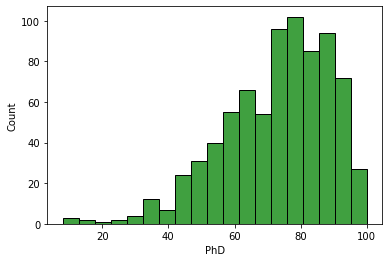

Boxplot of PhD
------------------------------


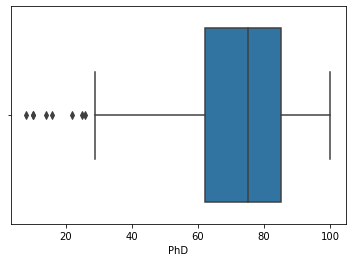

Description of Terminal
--------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------


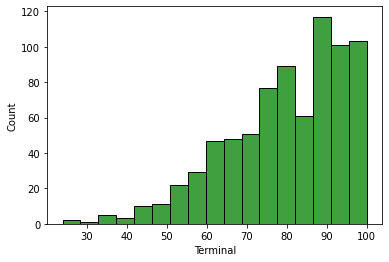

Boxplot of Terminal
------------------------------


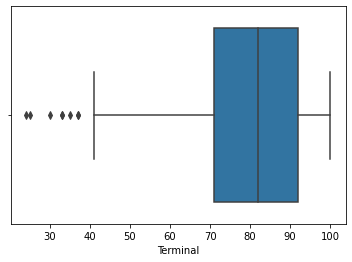

Description of S_F_Ratio
--------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S_F_Ratio, dtype: float64 Distribution of S_F_Ratio
----------------------------------


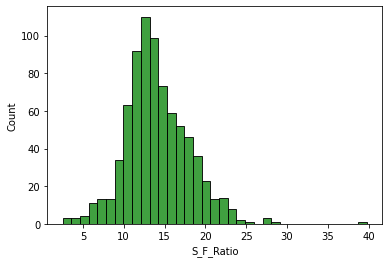

Boxplot of S_F_Ratio
------------------------------


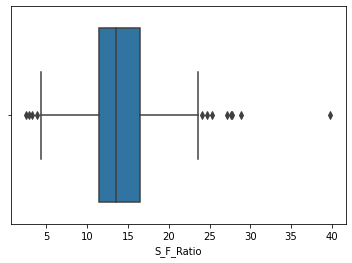

Description of perc_alumni
--------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc_alumni, dtype: float64 Distribution of perc_alumni
----------------------------------


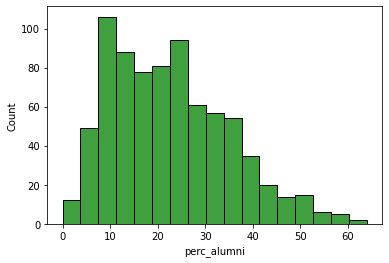

Boxplot of perc_alumni
------------------------------


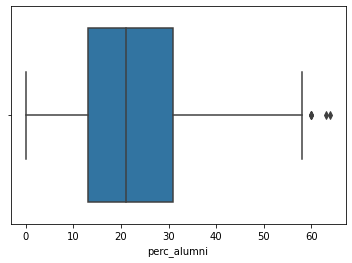

Description of Expend
--------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------


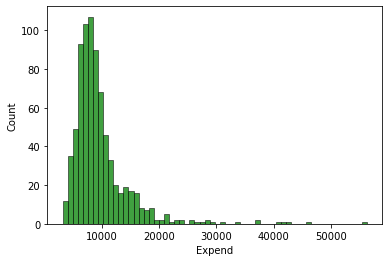

Boxplot of Expend
------------------------------


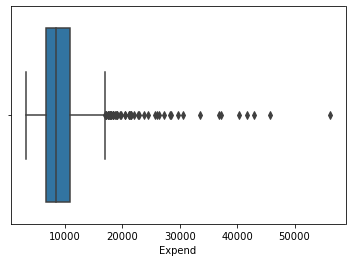

Description of Grad_Rate
--------------------------------
count    777.000000
mean      65.440154
std       17.118804
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad_Rate, dtype: float64 Distribution of Grad_Rate
----------------------------------


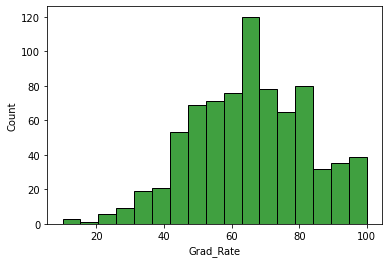

Boxplot of Grad_Rate
------------------------------


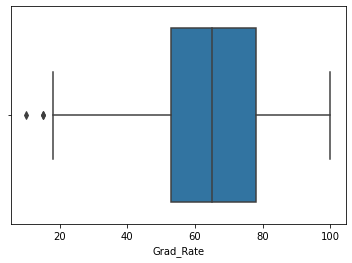

In [36]:
# Performing Univariate Data Analysis on all numeric columns of data set 'list_College_new' using 'for loop'.

for x in list_college_new:
    univariateAnalysis_numeric(x,50)

##### Inference from Univariate Data Analysis: 


###### * Right skewed variables in the data set are as follows : 'Application', 'Accept', 'Enroll', 'Top10perc', 'Fulltime_undergrad', 'Parttime_Undergrad', 'Books', 'Personal', 'perc_alumni', 'Expend'.

###### * Some variables seem to be normally distributed eg. 'Top25perc', 'Outstate', 'Room_Board', 'S_F_Ratio'.

###### * A few left skewed variables are as follows :  'PhD', 'Terminal', 'Grad_Rate'. 

###### * All the variables have outliers except a variable named 'Top25perc'.



In [56]:
# Defining 'corr' for bivariate analysis.

corr = college_new.corr(method='pearson')


#### *2.1.2 - Performing Bivariate Analysis

##### Let us define a function named 'Bivariate_Analysis_Num' to perform bivariate analysis by making 'pairplot' and 'heatmap' on numeric variables in 'college_new' data set.

In [54]:

def Bivariate_Analysis_Num():
    plt.figure(figsize=(25,15))
    plt.figure("Pairplot of " )
    print("------------------------------")
    sns.pairplot(college_new)
    plt.show()
    
    
    plt.figure(figsize=(30,20))
    plt.figure("Coorelation of " )
    print("------------------------------")
    sns.heatmap(college_new.corr(), annot=True, fmt='.1f')
    plt.show()

------------------------------


<Figure size 1800x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

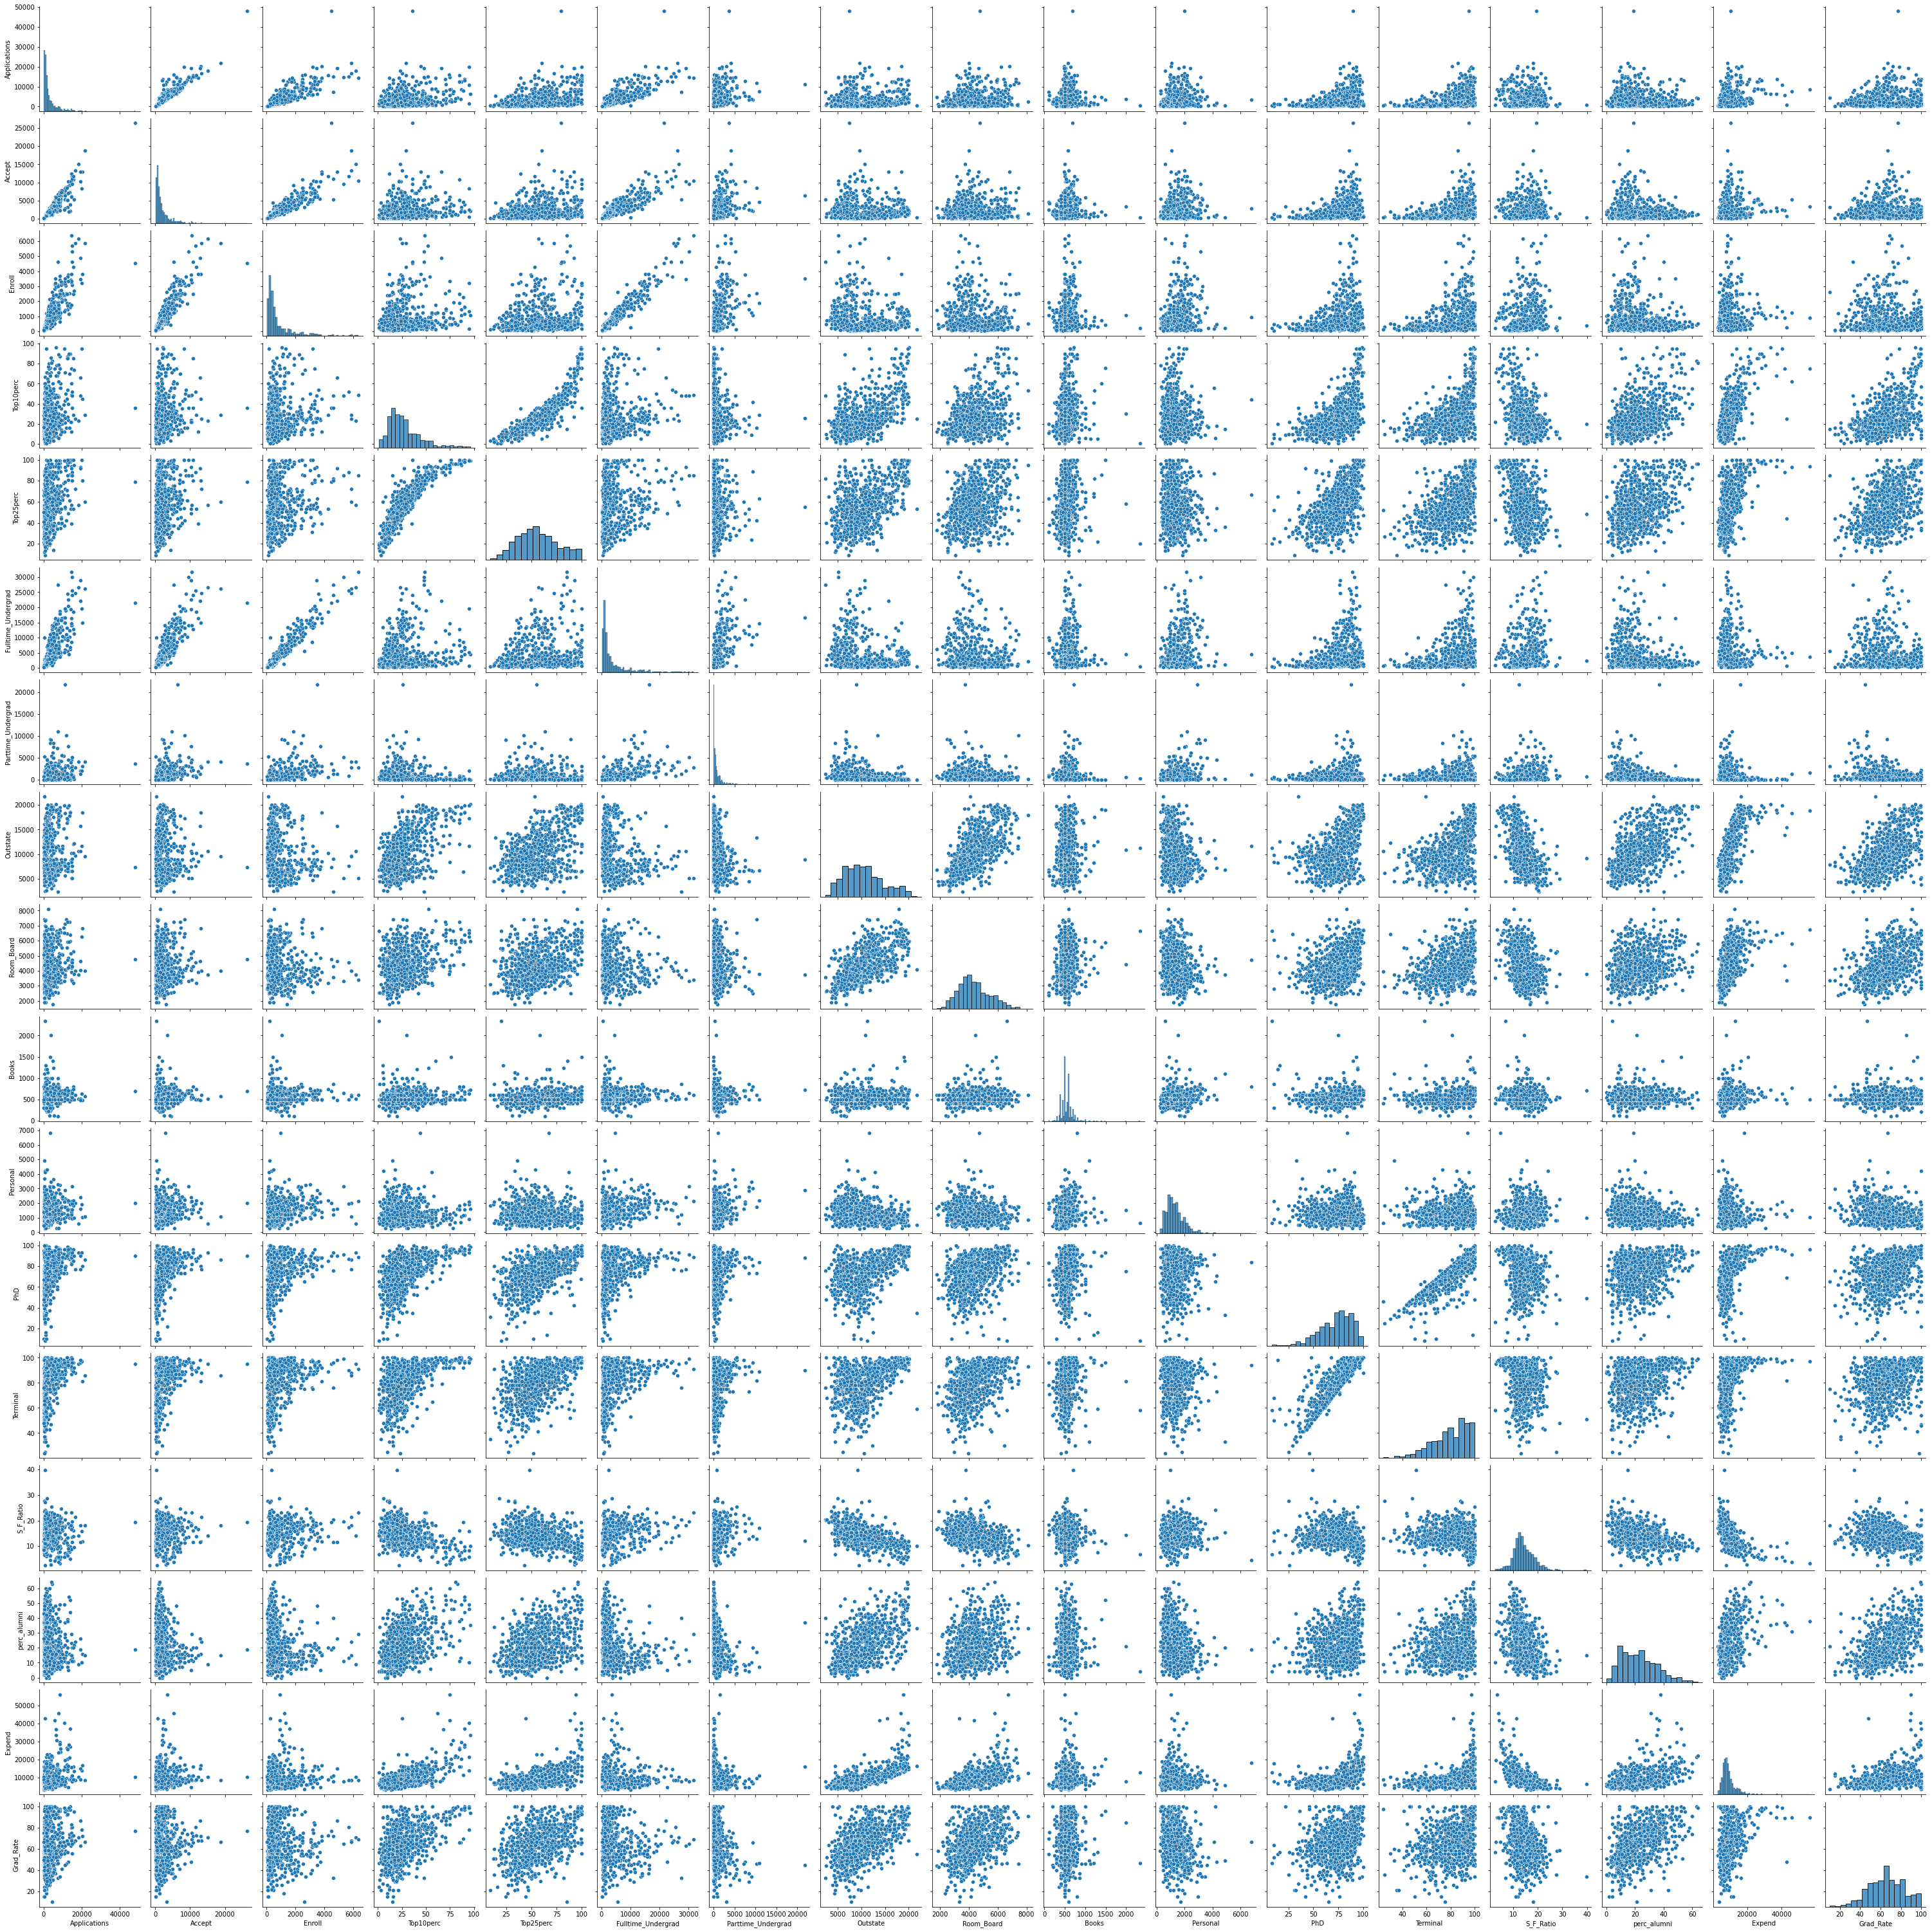

------------------------------


<Figure size 2160x1440 with 0 Axes>

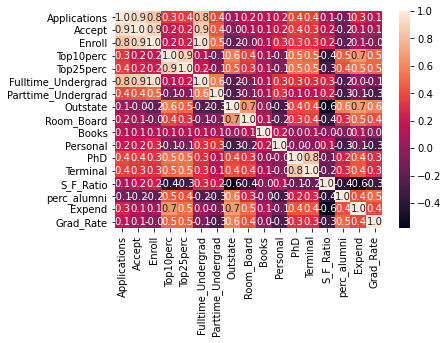

In [55]:
Bivariate_Analysis_Num()

##### Inference from the Bivariate Analysis: 

##### * High positive correlated variables with respect to variable 'Applicaton' are as follows: 

1) Applications - Accept - 0.9

2) Applications - Enroll - 0.8

3) Applications - Fulltime_Undergrad - 0.8

##### * High positive correlated variables with respect to variable 'Top10perc' are as follows: 

1) Top10perc - Top25perc - 0.9

2) Top10perc - Outstate   - 0.6

3) Top10perc - Phd        - 0.5

4) Top10perc - Terminal   - 0.5

5) Top10perc - perc_alumni - 0.5

6) Top10perc - Expend      - 0.7

7) Top10perc - Grad_rate   - 0.5

##### * High positive correlated variables with respect to variable 'Top25perc' are as follows:

1) Top25perc - Top10perc  - 0.9

2) Top25perc - Outstate   - 0.5

3) Top25perc - Phd        - 0.5

4) Top25perc - Terminal   - 0.5

5) Top25perc - Expend     - 0.5

6) Top25perc - Grad_rate  - 0.5

##### * High positive correlated variables with respect to variable 'Fulltime_Undergrad' are as follows:

1) Fulltime_Undergrad - Applications - 0.8

2) Fulltime_Undergrad - Accept       - 0.9

3) Fulltime_Undergrad - Enroll       - 1.0

4) Fulltime_Undergrad - Parttime_Undergrad - 0.6

##### * High positive correlated variables with respect to variable 'Parttime_Undergrad' are as follows:

1) Parttime_Undergrad - Enroll - 0.5

2) Parttime_Undergrad - Fulltime_Undergrad - 0.6

##### * High positive correlated variables with respect to variable 'Outstate' are as follows:

1) Outstate  -  Top10perc  - 0.5

2) Outstate  -  Top25perc  - 0.6

3) Outstate  -  RoomBoard  - 0.7

4) Outstate  -  perc_alumni- 0.6

5) Outstate  -  Expend     - 0.7

6) Outstate  -  Grad_Rate  - 0.6

##### * High positive correlated variables with respect to variable 'Room_Board' are as follows:

1) Room_Board - Outstate -  0.7

2) Room_Board - Expend   -  0.5

##### * High positive correlated variables with respect to variable 'PhD' are as follows:

1) PhD - Top10perc - 0.5

2) PhD - Top25perc - 0.5

3) PhD - Terminal  - 0.8


##### * High positive correlated variables with respect to variable 'perc_alumni' are as follows:

1) perc_alumni - Top10perc  - 0.5

2) perc_alumni - Outstate   - 0.6

3) perc_alumni - Grad_Rate  - 0.5


##### * High positive correlated variables with respect to variable 'Expend' are as follows:

1) Expend  - Top10perc  - 0.7

2) Expend  - Top25perc  - 0.5

3) Expend  - Outstate   - 0.7

4) Expend  - RoomBoard  - 0.5

##### * High positive correlated variables with respect to variable 'Grad_Rate' are as follows:

1) Grad_Rate  - Top10perc - 0.5

2) Grad_Rate  - Top25perc - 0.5

3) Grad_Rate  - Outstate  - 0.6

4) Grad_Rate  - perc_alumni-0.5


##### * Note - 

* "High correlated variables for 'Accept' and 'Enroll' are almost same as 'Applications' variable."

* "Variables 'Books', 'Personal' and 'S_F Ratio' have no variable with high positive coorelation." 

* "Variable 'Terminal' has the same variables with high coorelation as variables 'PhD'."

#### 2.2) Is scaling necessary for PCA in this case? Give justification and perform scaling.

Yes, Scaling is necessary for PCA in this case as the magnitude of every feature varies much and to create new vector space we need to minimise the difference between the values of every feature, so i'll simply apply zscore on the data set and scale down the data.  

In [78]:
# Importing zscore from scipy.stats and perform scaling on the data set 'college_new'.
from scipy.stats import zscore

college_new_scaled = college_new.apply(zscore)
college_new_scaled.head()

Applications    Accept    Enroll  Top10perc  Top25perc  Fulltime_Undergrad  \
0     -0.346882 -0.321205 -0.063509  -0.258583  -0.191827           -0.168116   
1     -0.210884 -0.038703 -0.288584  -0.655656  -1.353911           -0.209788   
2     -0.406866 -0.376318 -0.478121  -0.315307  -0.292878           -0.549565   
3     -0.668261 -0.681682 -0.692427   1.840231   1.677612           -0.658079   
4     -0.726176 -0.764555 -0.780735  -0.655656  -0.596031           -0.711924   

   Parttime_Undergrad  Outstate  Room_Board     Books  Personal       PhD  \
0           -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.162859   
1            0.244307  0.457496    1.909208  1.215880  0.235515 -2.676529   
2           -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.205112   
3           -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185939   
4            0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204995   

   Terminal  S_F_Ratio  perc_alumni    Expend  Grad_Rate  
0 -0.115729   1.013776    -0.867574 -0.501910  -0.317993  
1 -3.378176  -0.477704    -0.544572  0.166110  -0.551805  
2 -0.931341  -0.300749     0.585935 -0.177290  -0.668710  
3  1.175657  -1.615274     1.151188  1.792851  -0.376446  
4 -0.523535  -0.553542    -1.675079  0.241803  -2.948375

#### 2.3) Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [84]:
# Checking covariance matrices:

college_new_scaled.cov()

Applications    Accept    Enroll  Top10perc  Top25perc  \
Applications            1.001289  0.944666  0.847913   0.339270   0.352093   
Accept                  0.944666  1.001289  0.912811   0.192695   0.247795   
Enroll                  0.847913  0.912811  1.001289   0.181527   0.227037   
Top10perc               0.339270  0.192695  0.181527   1.001289   0.893144   
Top25perc               0.352093  0.247795  0.227037   0.893144   1.001289   
Fulltime_Undergrad      0.815540  0.875350  0.965883   0.141471   0.199702   
Parttime_Undergrad      0.398777  0.441839  0.513730  -0.105492  -0.053646   
Outstate                0.050224 -0.025788 -0.155678   0.563055   0.490024   
Room_Board              0.165152  0.091016 -0.040284   0.371959   0.331917   
Books                   0.132729  0.113672  0.112856   0.119012   0.115676   
Personal                0.178961  0.201248  0.281291  -0.093437  -0.080914   
PhD                     0.391516  0.356514  0.332172   0.532811   0.546900   
Terminal                0.369968  0.338018  0.308671   0.491768   0.525425   
S_F_Ratio               0.095756  0.176456  0.237577  -0.385370  -0.295009   
perc_alumni            -0.090342 -0.160196 -0.181027   0.456072   0.418403   
Expend                  0.259927  0.124878  0.064252   0.661765   0.528127   
Grad_Rate               0.147153  0.066848 -0.022077   0.498760   0.480965   

                    Fulltime_Undergrad  Parttime_Undergrad  Outstate  \
Applications                  0.815540            0.398777  0.050224   
Accept                        0.875350            0.441839 -0.025788   
Enroll                        0.965883            0.513730 -0.155678   
Top10perc                     0.141471           -0.105492  0.563055   
Top25perc                     0.199702           -0.053646  0.490024   
Fulltime_Undergrad            1.001289            0.571247 -0.216020   
Parttime_Undergrad            0.571247            1.001289 -0.253839   
Outstate                     -0.216020           -0.253839  1.001289   
Room_Board                   -0.068979           -0.061405  0.655100   
Books                         0.115699            0.081304  0.038905   
Personal                      0.317608            0.320294 -0.299472   
PhD                           0.319003            0.149481  0.383965   
Terminal                      0.300406            0.142086  0.408509   
S_F_Ratio                     0.280064            0.232830 -0.555536   
perc_alumni                  -0.229758           -0.281154  0.566992   
Expend                        0.018676           -0.083676  0.673646   
Grad_Rate                    -0.078394           -0.257466  0.574351   

                    Room_Board     Books  Personal       PhD  Terminal  \
Applications          0.165152  0.132729  0.178961  0.391516  0.369968   
Accept                0.091016  0.113672  0.201248  0.356514  0.338018   
Enroll               -0.040284  0.112856  0.281291  0.332172  0.308671   
Top10perc             0.371959  0.119012 -0.093437  0.532811  0.491768   
Top25perc             0.331917  0.115676 -0.080914  0.546900  0.525425   
Fulltime_Undergrad   -0.068979  0.115699  0.317608  0.319003  0.300406   
Parttime_Undergrad   -0.061405  0.081304  0.320294  0.149481  0.142086   
Outstate              0.655100  0.038905 -0.299472  0.383965  0.408509   
Room_Board            1.001289  0.128128 -0.199685  0.330032  0.375022   
Books                 0.128128  1.001289  0.179526  0.026879  0.100084   
Personal             -0.199685  0.179526  1.001289 -0.010713 -0.030653   
PhD                   0.330032  0.026879 -0.010713  1.001289  0.850904   
Terminal              0.375022  0.100084 -0.030653  0.850904  1.001289   
S_F_Ratio            -0.363095 -0.031970  0.136521 -0.130951 -0.160310   
perc_alumni           0.272714 -0.040260 -0.286337  0.249563  0.267475   
Expend                0.502386  0.112554 -0.098018  0.433648  0.439365   
Grad_Rate             0.426356  0.000650 -0.268935  0.311132

<AxesSubplot:>

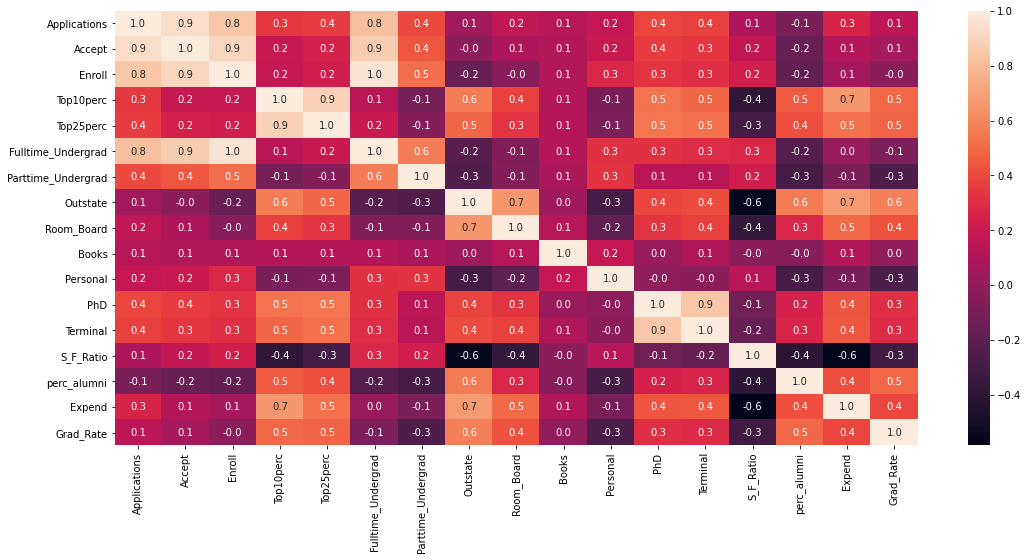

In [94]:
plt.figure(figsize=(18,8))
sns.heatmap(college_new_scaled.cov(),annot=True, fmt='.1f')

In [93]:
# Checking correlation matrices:

college_new_scaled.corr(method='pearson')

Applications    Accept    Enroll  Top10perc  Top25perc  \
Applications            1.000000  0.943451  0.846822   0.338834   0.351640   
Accept                  0.943451  1.000000  0.911637   0.192447   0.247476   
Enroll                  0.846822  0.911637  1.000000   0.181294   0.226745   
Top10perc               0.338834  0.192447  0.181294   1.000000   0.891995   
Top25perc               0.351640  0.247476  0.226745   0.891995   1.000000   
Fulltime_Undergrad      0.814491  0.874223  0.964640   0.141289   0.199445   
Parttime_Undergrad      0.398264  0.441271  0.513069  -0.105356  -0.053577   
Outstate                0.050159 -0.025755 -0.155477   0.562331   0.489394   
Room_Board              0.164939  0.090899 -0.040232   0.371480   0.331490   
Books                   0.132559  0.113525  0.112711   0.118858   0.115527   
Personal                0.178731  0.200989  0.280929  -0.093316  -0.080810   
PhD                     0.391012  0.356055  0.331745   0.532125   0.546196   
Terminal                0.369491  0.337583  0.308274   0.491135   0.524749   
S_F_Ratio               0.095633  0.176229  0.237271  -0.384875  -0.294629   
perc_alumni            -0.090226 -0.159990 -0.180794   0.455485   0.417864   
Expend                  0.259592  0.124717  0.064169   0.660913   0.527447   
Grad_Rate               0.146964  0.066762 -0.022049   0.498118   0.480346   

                    Fulltime_Undergrad  Parttime_Undergrad  Outstate  \
Applications                  0.814491            0.398264  0.050159   
Accept                        0.874223            0.441271 -0.025755   
Enroll                        0.964640            0.513069 -0.155477   
Top10perc                     0.141289           -0.105356  0.562331   
Top25perc                     0.199445           -0.053577  0.489394   
Fulltime_Undergrad            1.000000            0.570512 -0.215742   
Parttime_Undergrad            0.570512            1.000000 -0.253512   
Outstate                     -0.215742           -0.253512  1.000000   
Room_Board                   -0.068890           -0.061326  0.654256   
Books                         0.115550            0.081200  0.038855   
Personal                      0.317200            0.319882 -0.299087   
PhD                           0.318592            0.149289  0.383471   
Terminal                      0.300019            0.141904  0.407983   
S_F_Ratio                     0.279703            0.232531 -0.554821   
perc_alumni                  -0.229462           -0.280792  0.566262   
Expend                        0.018652           -0.083568  0.672779   
Grad_Rate                    -0.078293           -0.257135  0.573612   

                    Room_Board     Books  Personal       PhD  Terminal  \
Applications          0.164939  0.132559  0.178731  0.391012  0.369491   
Accept                0.090899  0.113525  0.200989  0.356055  0.337583   
Enroll               -0.040232  0.112711  0.280929  0.331745  0.308274   
Top10perc             0.371480  0.118858 -0.093316  0.532125  0.491135   
Top25perc             0.331490  0.115527 -0.080810  0.546196  0.524749   
Fulltime_Undergrad   -0.068890  0.115550  0.317200  0.318592  0.300019   
Parttime_Undergrad   -0.061326  0.081200  0.319882  0.149289  0.141904   
Outstate              0.654256  0.038855 -0.299087  0.383471  0.407983   
Room_Board            1.000000  0.127963 -0.199428  0.329607  0.374540   
Books                 0.127963  1.000000  0.179295  0.026844  0.099955   
Personal             -0.199428  0.179295  1.000000 -0.010699 -0.030613   
PhD                   0.329607  0.026844 -0.010699  1.000000  0.849809   
Terminal              0.374540  0.099955 -0.030613  0.849809  1.000000   
S_F_Ratio            -0.362628 -0.031929  0.136345 -0.130783 -0.160104   
perc_alumni           0.272363 -0.040208 -0.285968  0.249242  0.267130   
Expend                0.501739  0.112409 -0.097892  0.433090  0.438799   
Grad_Rate             0.425808  0.000649 -0.268588  0.310732

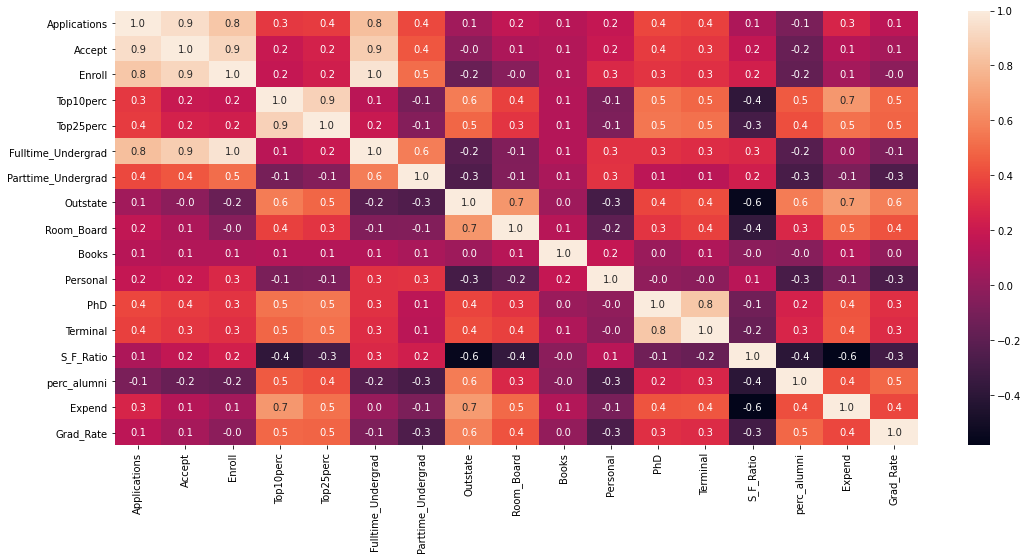

In [92]:
plt.figure(figsize=(18,8))
sns.heatmap(college_new_scaled.corr(),annot=True, fmt='.1f');

##### Comparison:  After plotting the heatmap for both the covariance and correlation matrices in the dataframe, we cannot see any major difference in both the plots, as we know the covariance matrices help us to know the direction of variation between variables whereas the correlation helps us to know the strength of relation between two variables. 

1)- By oberving the above plots of covariance and correlation matrices of the scaled data set, we can infer the following conclusions:

* Variables that are positively high correlated- (considering correlation above 0.5 as high positive high correlation/positive strong correlations)

a) For Applications - Accept(0.9),  Enroll(0.8), Fulltime_Undergrad(0.8)

b) For Top10perc - Top25perc(0.9), Outstate(0.6), Expend(0.7)

c) For Fulltime_Undergrad - Applications(0.8), Accept(0.9), Enroll(1), Parttime_Undergrad(0.6)

d) For Parttime_Undergrad - Fulltime_Undergrad(0.6)

e) For Outstate - Top10perc(0.6), Room_Board(0.7), perc_alumni(0.6), Expend(0.7), Grad_rate(0.6)

f) For Room_Board - Outstate(0.7)

g) For PhD - Terminal(0.8)

h) For Terminal - PhD(0.8)

i) For perc_alumni - Outstate(0.6)

j) For Expend - Top10perc(0.7), Outstate(0.7)

k) For Grad_rate - Outstate(0.6)


* Variables that are negatively high correlated - (considering variables with correlation greater than or equal to -0.3 as high negative correlated variables/negative strong relations.)

a) For Top10perc and Top25perc : S_F_Ratio is negatively high correlated with correlation value -0.4 and -0.3 respectively.

b) For Parttime_Undergrad : Outstate, perc_alumni and Grad_rate are negatively high coorelated with value -0.3 each.

c) For Outstate           : Parttime_Undergrad, Personal, S_F_Ratio are negatively high correlated with values -0.3, -0.3, -0.6 respectively.

d) For Room_Board         : S_F_Ratio is negatively high correlated with value -0.4.

e) For Personal           : Outstate, perc_alumni and Grad_Rate are negatively high correlated with value -0.3.

f) For S_F_Ratio          : Top10perc(-0.4), Top25perc(-0.3), Outstate(-0.6), Room_Board(-0.4), perc_alumni(-0.4), Expend(-0.6), Grad_Rate(-0.3) are negatively high correlated values.

g) For perc_alumni        : Parttime_Undergrad, Personal, S_F_Ratio are negatively high correlated values with values (-0.3), (-0.3)and (-0.4) respectively.

h) For Expend              : S_F_Ratio (-0.6) is negatively high correlated value. 

i) For Grad_rate            : Parttime_Undergrad, Personal, S_F_Ratio are the negatively high correlated values with correlation value (-0.3).

#### 2.4 - Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

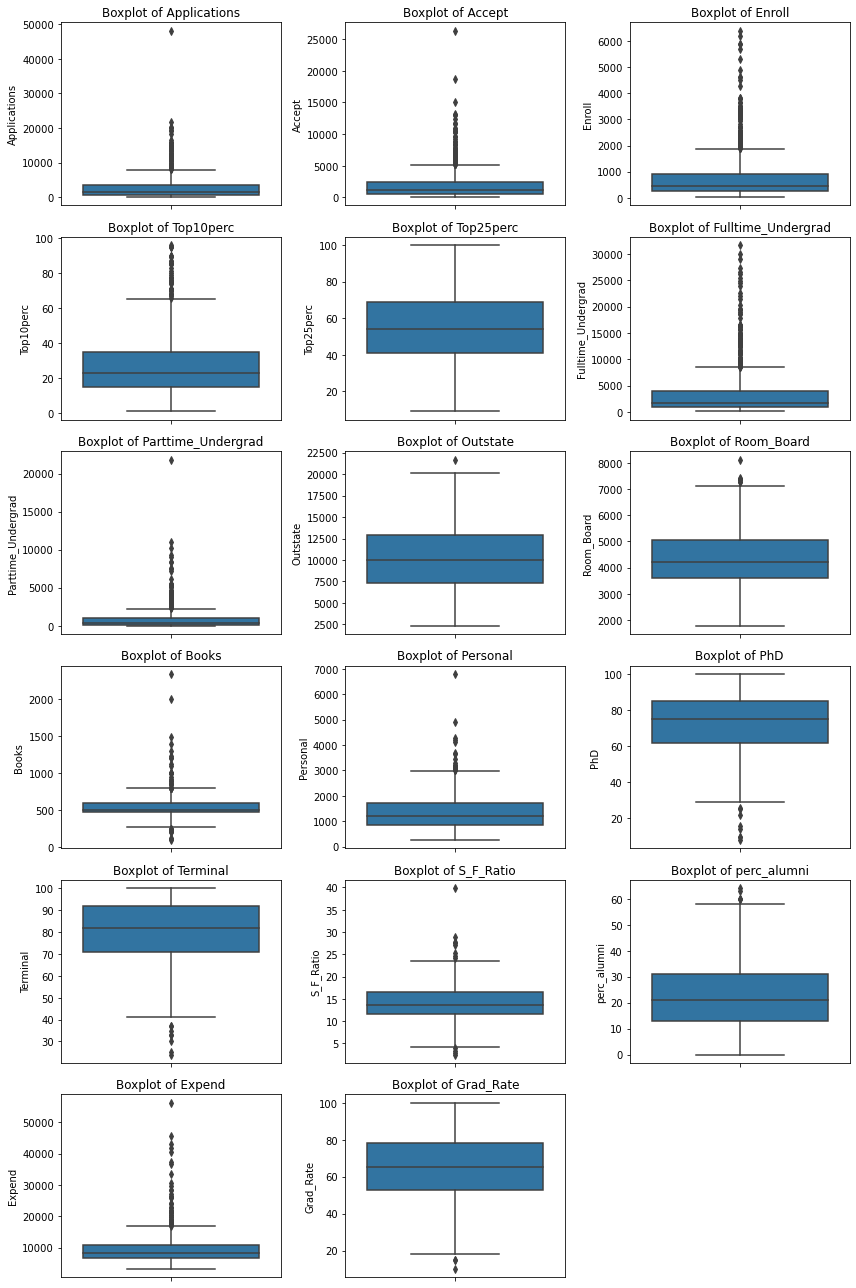

In [99]:
#Check for presence of outliers in each feature on the data set before scaling.

plt.figure(figsize = (12,18))
feature_list = college_new.columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y = college_new[feature_list[i]], data = college_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

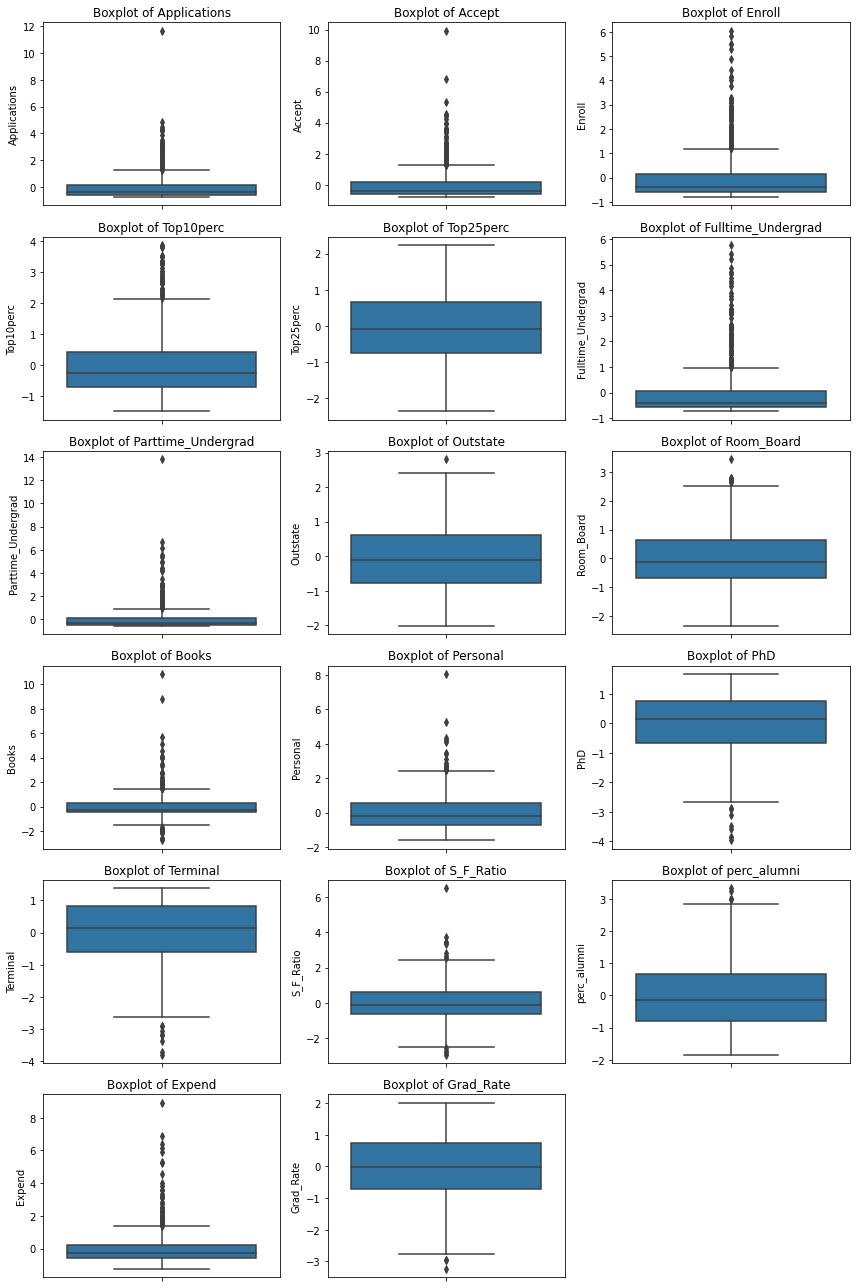

In [102]:
#Check for presence of outliers in each feature on the dataset after scaling.

plt.figure(figsize = (12,18))
feature_list1 = college_new_scaled.columns
for i in range(len(feature_list1)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y = college_new_scaled[feature_list1[i]], data = college_new_scaled)
    plt.title('Boxplot of {}'.format(feature_list1[i]))
    plt.tight_layout()

##### Inference: After scaling the range of features have reduced, however there is no evident effect on outliers. 

#### 2.5) Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [103]:
#Apply PCA taking all features

from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(college_new_scaled)

In [104]:
# Extract Eigen Vectors

pca.components_

array([[ 2.48183494e-01,  2.06969666e-01,  1.75694894e-01,
         3.54244165e-01,  3.43942665e-01,  1.54038269e-01,
         2.60218245e-02,  2.94935587e-01,  2.49048365e-01,
         6.45834383e-02, -4.27212841e-02,  3.18442536e-01,
         3.16946970e-01, -1.77143862e-01,  2.05340243e-01,
         3.18874326e-01,  2.53800631e-01],
       [ 3.32025554e-01,  3.72491384e-01,  4.04001896e-01,
        -8.18674207e-02, -4.42586593e-02,  4.17901438e-01,
         3.15112160e-01, -2.49149211e-01, -1.37349991e-01,
         5.64823263e-02,  2.19795159e-01,  5.86942062e-02,
         4.68443038e-02,  2.46336958e-01, -2.46268610e-01,
        -1.31140311e-01, -1.69072352e-01],
       [-6.16148087e-02, -9.97638535e-02, -8.22289219e-02,
         3.47636016e-02, -2.46996496e-02, -6.09712128e-02,
         1.39028188e-01,  4.73522670e-02,  1.50278691e-01,
         6.78096050e-01,  4.98147475e-01, -1.29562447e-01,
        -6.83497434e-02, -2.90605689e-01, -1.46940854e-01,
         2.27294587e-01, -2.0

In [106]:
# Extracting Eigen Values (returned in descending order)

pca.explained_variance_

array([5.45485033, 4.48406663, 1.17470127, 1.00536006, 0.9343371 ,
       0.84817556, 0.60551358, 0.58787041, 0.53053165, 0.40349818,
       0.31326156, 0.22048561, 0.16780564, 0.14368317, 0.08802439,
       0.03672101, 0.02302105])

#### 2.6 - Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features.

In [107]:
#Create a dataframe containing the loadings or coefficients of all PCs
college_new_pca_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17'],
                                    index = college_new_scaled.columns)

In [108]:
college_new_pca_extracted_loadings

PC1       PC2       PC3       PC4       PC5  \
Applications        0.248183  0.332026 -0.061615  0.282569  0.004158   
Accept              0.206970  0.372491 -0.099764  0.269149  0.054318   
Enroll              0.175695  0.404002 -0.082229  0.162611 -0.056603   
Top10perc           0.354244 -0.081867  0.034764 -0.052469 -0.394960   
Top25perc           0.343943 -0.044259 -0.024700 -0.111389 -0.425700   
Fulltime_Undergrad  0.154038  0.417901 -0.060971  0.100948 -0.044035   
Parttime_Undergrad  0.026022  0.315112  0.139028 -0.158473  0.303348   
Outstate            0.294936 -0.249149  0.047352  0.133122  0.221797   
Room_Board          0.249048 -0.137350  0.150279  0.186480  0.559744   
Books               0.064583  0.056482  0.678096  0.079488 -0.128343   
Personal           -0.042721  0.219795  0.498147 -0.236126 -0.221267   
PhD                 0.318443  0.058694 -0.129562 -0.533695  0.143265   
Terminal            0.316947  0.046844 -0.068350 -0.519385  0.207796   
S_F_Ratio          -0.177144  0.246337 -0.290606 -0.163696 -0.078557   
perc_alumni         0.205340 -0.246269 -0.146941  0.017638 -0.216206   
Expend              0.318874 -0.131140  0.227295  0.081376  0.075677   
Grad_Rate           0.253801 -0.169072 -0.206565  0.260607 -0.111222   

                         PC6       PC7       PC8       PC9      PC10  \
Applications       -0.014238 -0.039100 -0.103310 -0.090014  0.051840   
Accept              0.009380 -0.010000 -0.056181 -0.177557  0.040651   
Enroll             -0.041347 -0.026354  0.058515 -0.128424  0.033500   
Top10perc          -0.053064 -0.162338 -0.124270  0.340477  0.064306   
Top25perc           0.032288 -0.120419 -0.103696  0.403223  0.013972   
Fulltime_Undergrad -0.042658 -0.024583  0.078698 -0.059394  0.019793   
Parttime_Undergrad -0.192744  0.051249  0.570822  0.560391 -0.223572   
Outstate           -0.028860  0.110254  0.011062 -0.003518  0.184696   
Room_Board          0.164168  0.213122 -0.219258  0.276787  0.295396   
Books               0.641364 -0.149629  0.211923 -0.134222 -0.082654   
Personal           -0.333976  0.634529 -0.226602 -0.091779  0.136411   
PhD                 0.087686 -0.002706 -0.077122 -0.185673 -0.121427   
Terminal            0.151537 -0.032226 -0.012556 -0.256000 -0.084304   
S_F_Ratio           0.486124  0.219170 -0.081301  0.276263  0.473005   
perc_alumni        -0.047228  0.238711  0.681300 -0.252991  0.422491   
Expend             -0.297658 -0.226666 -0.056379 -0.050321  0.137175   
Grad_Rate           0.216104  0.559962 -0.000434  0.043227 -0.591709   

                        PC11      PC12      PC13      PC14      PC15  \
Applications        0.043113  0.024237  0.596031  0.077552  0.133371   
Accept             -0.058452 -0.145492  0.292866  0.031536 -0.145389   
Enroll             -0.069240  0.011181 -0.445158 -0.083260  0.029595   
Top10perc          -0.008561  0.038380  0.000458 -0.108208  0.697751   
Top25perc          -0.273498 -0.090251  0.022658  0.151278 -0.617187   
Fulltime_Undergrad -0.080972  0.056265 -0.524070 -0.053443  0.009912   
Parttime_Undergrad  0.101831 -0.062964  0.126136  0.019290  0.020932   
Outstate            0.144196 -0.823344 -0.142325 -0.033705  0.038561   
Room_Board         -0.360563  0.353706 -0.070291 -0.058204  0.003446   
Books               0.032611 -0.027818  0.011045 -0.066945 -0.009486   
Personal           -0.019213 -0.039503  0.039708  0.027723 -0.003042   
PhD                 0.040602  0.023533  0.124170 -0.691987 -0.112189   
Terminal           -0.060350  0.015627 -0.054244  0.670859  0.158994   
S_F_Ratio           0.443252 -0.010983 -0.017489  0.041368 -0.020893   
perc_alumni        -0.132747  0.181691  0.103822 -0.028208 -0.008352   
Expend              0.690442  0.326529 -0.093233  0.074054 -0.227821   
Grad_Rate           0.223168  0.124426 -0.068591  0.039669 -0.003677   

                        PC16      PC17  
Applications        0.459077  0.359247  
Accept             -0.518177 -0.543646  
Enroll     

#### 2.7 - Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [140]:
for key in college_new_pca_extracted_loadings['PC1'].to_dict():
    print(key + ' * ' + str(college_new_pca_extracted_loadings['PC1'].to_dict()[key]))
    print('+')

Applications * 0.24818349429346204
+
Accept * 0.20696966588306664
+
Enroll * 0.17569489381338466
+
Top10perc * 0.35424416474948767
+
Top25perc * 0.34394266498393106
+
Fulltime_Undergrad * 0.15403826924554445
+
Parttime_Undergrad * 0.026021824545826758
+
Outstate * 0.294935586610446
+
Room_Board * 0.24904836463790092
+
Books * 0.06458343827675214
+
Personal * -0.04272128414950783
+
PhD * 0.31844253591061145
+
Terminal * 0.3169469697260502
+
S_F_Ratio * -0.17714386181140646
+
perc_alumni * 0.2053402427093824
+
Expend * 0.3188743256177697
+
Grad_Rate * 0.25380063114161455
+


In [139]:
print('PC1 = (Applications * 0.24+ Accept * 0.20 + Enroll * 0.17 + Top10perc * 0.35 +Top25perc * 0.34 + Fulltime_Undergrad * 0.15 + Parttime_Undergrad * 0.02 + Outstate * 0.29 + Room_Board * 0.24 + Books * 0.06 + Personal * -0.04 + PhD * 0.31 + Terminal * 0.31 + S_F_Ratio * -0.17 + perc_alumni * 0.20 + Expend * 0.32 + Grad_Rate * 0.25)')

PC1 = (Applications * 0.24+ Accept * 0.20 + Enroll * 0.17 + Top10perc * 0.35 +Top25perc * 0.34 + Fulltime_Undergrad * 0.15 + Parttime_Undergrad * 0.02 + Outstate * 0.29 + Room_Board * 0.24 + Books * 0.06 + Personal * -0.04 + PhD * 0.31 + Terminal * 0.31 + S_F_Ratio * -0.17 + perc_alumni * 0.20 + Expend * 0.32 + Grad_Rate * 0.25)


#### 2.8 - Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [111]:
# Check the cumulative expalined variance of  i.e. cumulative values of the eigenvalues. 

np.cumsum(pca.explained_variance_)

array([ 5.45485033,  9.93891696, 11.11361824, 12.1189783 , 13.0533154 ,
       13.90149097, 14.50700455, 15.09487496, 15.62540661, 16.02890479,
       16.34216635, 16.56265196, 16.7304576 , 16.87414078, 16.96216516,
       16.99888617, 17.02190722])

In [125]:
pca.explained_variance_ratio_

array([0.32046058, 0.26342915, 0.06901114, 0.05906272, 0.05489027,
       0.04982847, 0.0355726 , 0.03453611, 0.03116758, 0.02370464,
       0.01840343, 0.01295305, 0.00985822, 0.00844107, 0.00517124,
       0.00215728, 0.00135244])

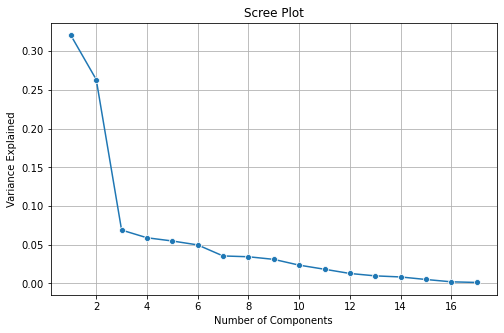

In [126]:
# * Plotting scree plot to check the optimum number of principal components

#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()



##### Deciding on the optimum number of principal components : 

* After observing, eigen values, cumulative eigen values and scree plot, we can decide that the initial 8 components explain about 80-85% of the variance, so 8 should be the optimum number of principal components.
 
* Eigenvectors indicate the directions of new feature space. 

#### 2.9 - Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

##### Business Implications of PCA : 

* By using PCA, we can remove noise and pay attention to the dimension and features that really important for our business analysis.

* We can observe from PC1 that the loadings of only few features like Top10perc, top25perc, PhD, Terminal, Application, Accept, Expend, Outstate are high positive values while the features like S_F_Ratio and Personal are negative correlated.

* So, By PCs it will be easy for the students to choose colleges and ranking agencies to rank colleges by just observing few important features that are necessary factors to differentiate the status of colleges. 

